# 1. Importando as Bibliotecas

In [171]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

import warnings
warnings.simplefilter('ignore')

# 2. Importando a Base de Dados

**Descrição das Features**
* country: Nome do país
* child_mort: Morte de crianças menores de 5 anos por 1000 nascimentos vivos
* exports: Exportações de bens e serviços per capita. Dado como % do PIB per capita
* health: Gastos totais com saúde per capita. Dado como % do PIB per capita
* imports: Importações de bens e serviços per capita. Dado como % do PIB per capita
* Income: Renda líquida por pessoa
* Inflation: Medição da taxa de crescimento anual do PIB total
* life_expec: Número médio de anos que um recém-nascido viveria se os padrões atuais de mortalidade permanecessem os mesmos
* total_fer: Número de filhos que nasceria por mulher se as taxas atuais de fertilidade por idade permanecessem as mesmas
* gdpp: PIB per capita. Calculado como o PIB total dividido pela população total.

In [3]:
country_data = pd.read_csv('dataset/Country-data.csv')

In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
country_data.duplicated().sum()

0

In [32]:
country_data.set_index('country', inplace=True)

# 3. EDA

In [33]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [52]:
# Percentil 90: Significa que 90% dos dos países apresenta um valor de child_mort menor ou igual de 100. 
country_data['child_mort'].quantile(0.90)

100.22000000000001

In [54]:
# Vemos que, em 17 países dos 167, um total de 100 crianças, com até 5 anos de idade, morrem a cada 1000 nascimentos. Isso representa 
# 10% do total de nascimentos. Outros países apresentam uma txa maior, chegando até 20%.
len(country_data[country_data['child_mort'] > country_data['child_mort'].quantile(0.90)])

17

In [69]:
country_data['child_mort'].sort_values(ascending=True)[-10:]

country
Burkina Faso                116.0
Congo, Dem. Rep.            116.0
Angola                      119.0
Niger                       123.0
Nigeria                     130.0
Mali                        137.0
Central African Republic    149.0
Chad                        150.0
Sierra Leone                160.0
Haiti                       208.0
Name: child_mort, dtype: float64

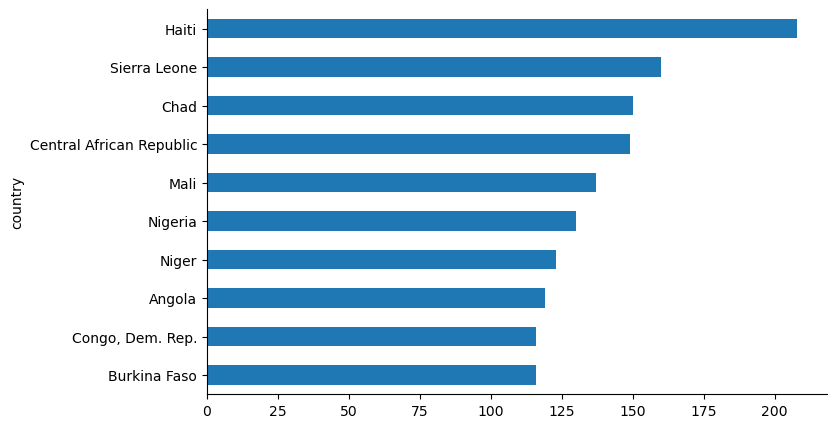

In [68]:
# Países com maior taxa de mortalidade
country_data['child_mort'].sort_values(ascending=True)[-10:].plot.barh(rot=0, figsize=(8, 5))
sns.despine()

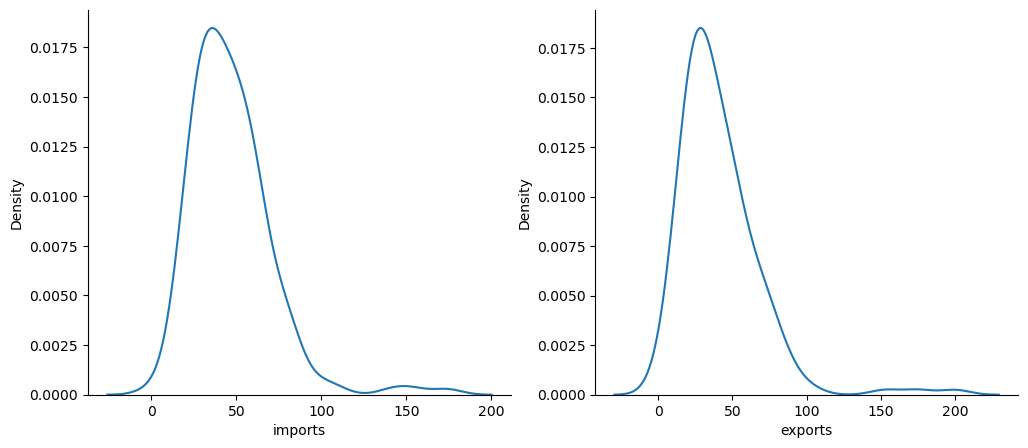

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data=country_data, x='imports', ax=axs[0])
sns.kdeplot(data=country_data, x='exports', ax=axs[1])
sns.despine()

In [86]:
# Países que mais importam Bens e Servições
country_data['imports'].sort_values(ascending=False)[:10]

country
Singapore                174.0
Malta                    154.0
Luxembourg               142.0
Seychelles               108.0
Lesotho                  101.0
Liberia                   92.6
Ireland                   86.5
Kyrgyz Republic           81.7
Solomon Islands           81.2
Micronesia, Fed. Sts.     81.0
Name: imports, dtype: float64

In [88]:
# Países que menos importam Bens e Servições
country_data['imports'].sort_values(ascending=True)[:10]

country
Myanmar           0.0659
Brazil           11.8000
Japan            13.6000
United States    15.8000
Argentina        16.0000
Sudan            17.2000
Nigeria          17.4000
Venezuela        17.6000
Colombia         17.8000
Gabon            18.9000
Name: imports, dtype: float64

In [90]:
# Países que mais exportam Bens e Servições
country_data['exports'].sort_values(ascending=False)[:10]

country
Singapore               200.0
Luxembourg              175.0
Malta                   153.0
Ireland                 103.0
Seychelles               93.8
Malaysia                 86.9
Equatorial Guinea        85.8
Congo, Rep.              85.1
Hungary                  81.8
United Arab Emirates     77.7
Name: exports, dtype: float64

In [91]:
# Países que menos exportam Bens e Servições
country_data['exports'].sort_values(ascending=True)[:10]

country
Myanmar                      0.109
Timor-Leste                  2.200
Eritrea                      4.790
Burundi                      8.920
Nepal                        9.580
Afghanistan                 10.000
Brazil                      10.700
Central African Republic    11.800
Rwanda                      12.000
Tonga                       12.400
Name: exports, dtype: float64

In [93]:
# Os primeiros países que apresentaram menor crescimento do PIB anual, uns sendo até negativo.
country_data['inflation'].sort_values(ascending=True)[:10]

country
Seychelles       -4.210
Ireland          -3.220
Japan            -1.900
Czech Republic   -1.430
Slovenia         -0.987
Latvia           -0.812
Bahamas          -0.393
Singapore        -0.046
Spain             0.160
Lebanon           0.238
Name: inflation, dtype: float64

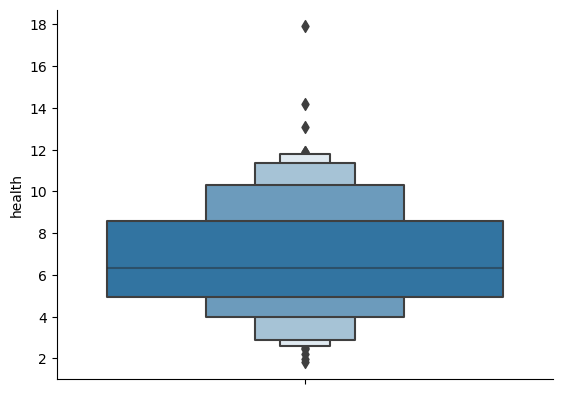

In [105]:
sns.boxenplot(data=country_data, y='health')
sns.despine()

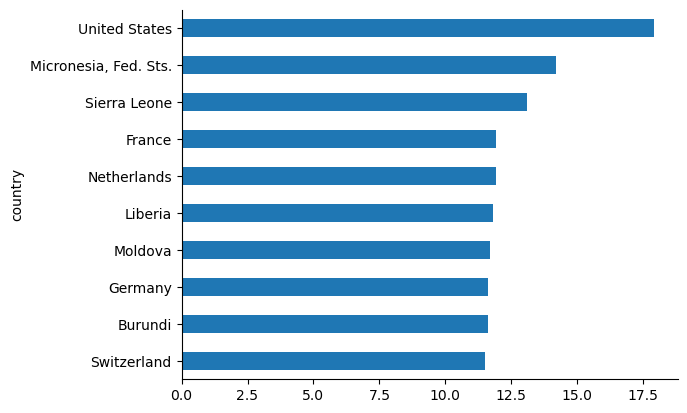

In [109]:
# Países com maiores gastos em saúde (per capita)
country_data['health'].sort_values(ascending=True)[-10:].plot.barh()
sns.despine()

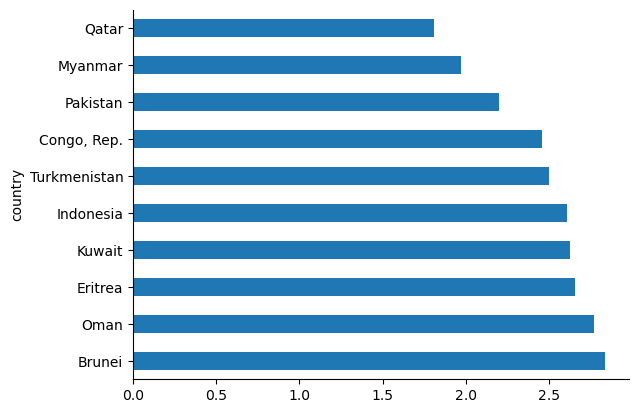

In [110]:
# Países com menores gastos em saúde (per capita)
country_data['health'].sort_values(ascending=False)[-10:].plot.barh()
sns.despine()

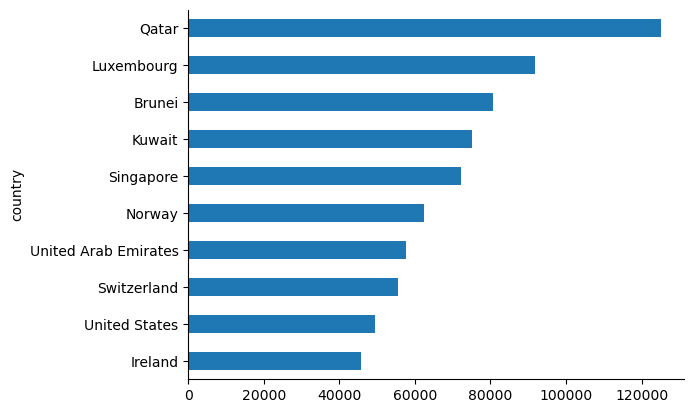

In [111]:
# Países com maiores renda líquida
country_data['income'].sort_values(ascending=True)[-10:].plot.barh()
sns.despine()

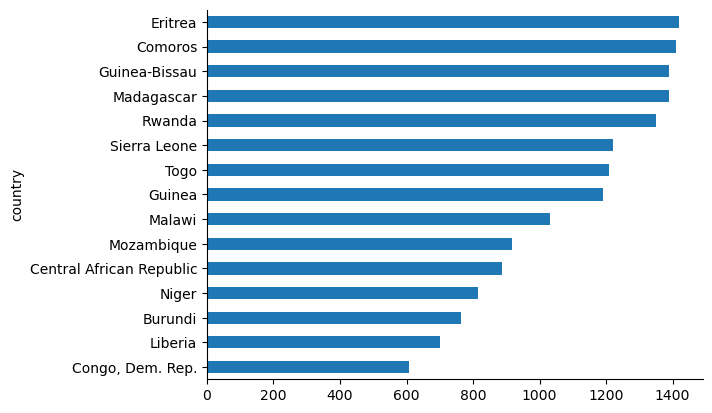

In [119]:
# Países com menores renda líquida
country_data['income'].sort_values(ascending=True)[:15].plot.barh()
sns.despine()

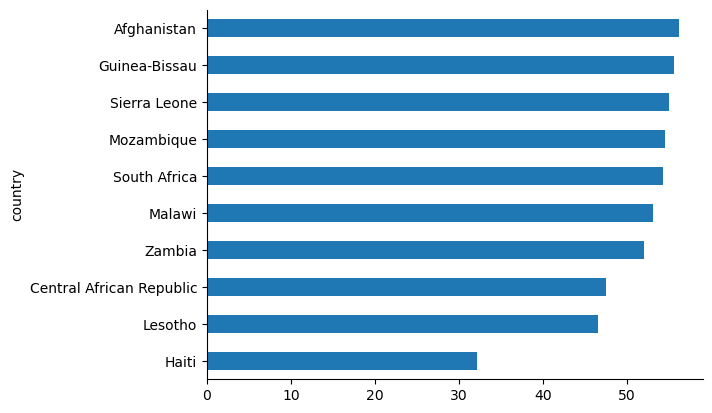

In [118]:
# Países com menores expectativa de vida
country_data['life_expec'].sort_values(ascending=True)[:10].plot.barh()
sns.despine()

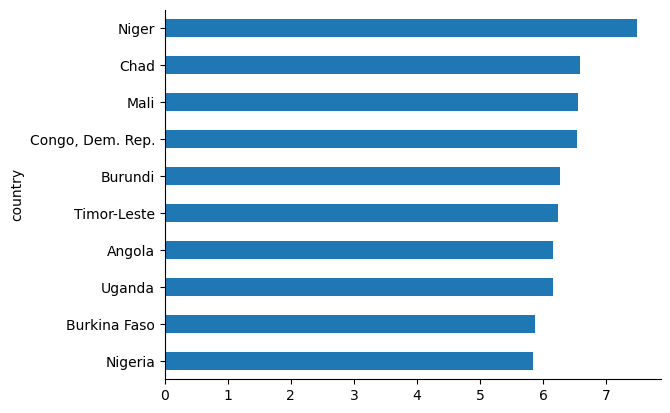

In [124]:
# Países com maiores taxa de nascimento
country_data['total_fer'].sort_values(ascending=True)[-10:].plot.barh()
sns.despine()

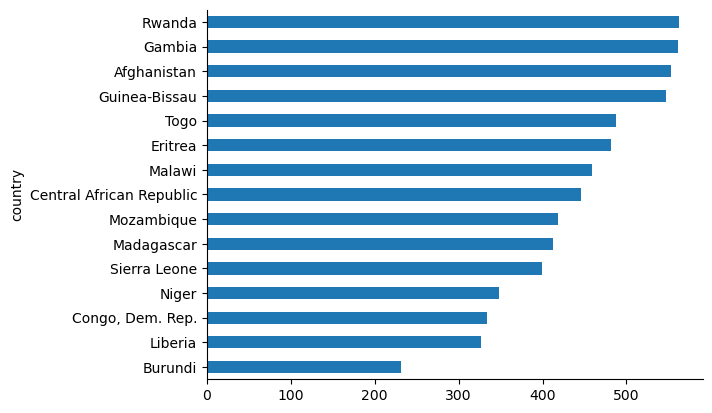

In [129]:
# Países com menores PIB per capita
country_data['gdpp'].sort_values(ascending=True)[:15].plot.barh()
sns.despine()

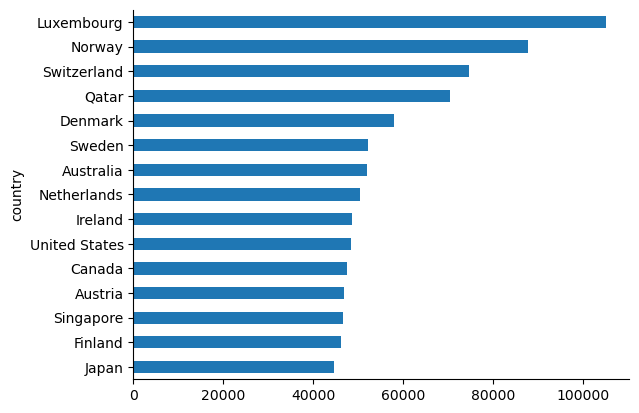

In [131]:
# Países com maiores PIB per capita
country_data['gdpp'].sort_values(ascending=True)[-15:].plot.barh()
sns.despine()

<Axes: >

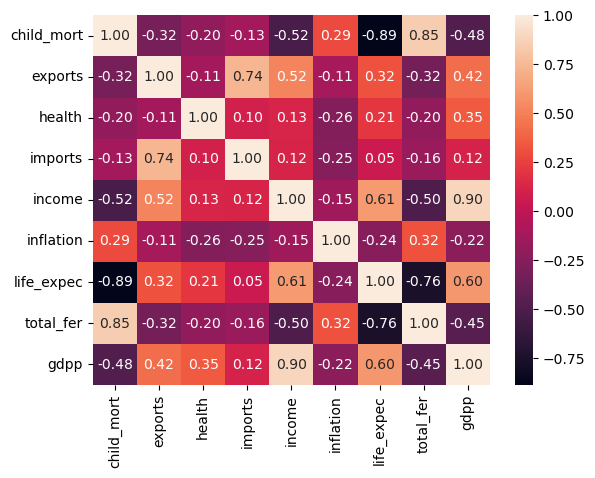

In [142]:
sns.heatmap(country_data.corr(), annot=True, fmt='.2f')

Observações:

---

* Aparentemente, a expectitiva de vida das pessoas tendem a crescer com o aumento do PIB e da renda líquida. Veja no mapa de correlações que elas estão, de maneira moderada, positivamente correlacionadas. Porém, a taxa de nascimento tende a diminuir.
* A tendência é de que a renda líquida por pessoa aumente com o crescimento do PIB;
* Os países com maiores taxa de mortalidade de crianças menores que 5 anos (a cada 1000 nascidos), tendem a apresentam maior taxa de fecundidade e menor o Renda Per Capita;

# 4. ML Models

## Preparação da Base de Dados

In [163]:
# Instanciândo o Scaler
scaler = StandardScaler()

# Padronizando os dados
X_transformed = scaler.fit_transform(country_data)

# transformando em um DataFrame
df_country_transformed = pd.DataFrame(X_transformed, columns=scaler.get_feature_names_out())

## Encontrando o número de clusters ideal

In [208]:
distortions = list()
n_clusters = range(2, 15)

for n_cluster in n_clusters:
    distortions.append(KMeans(n_clusters=n_cluster,max_iter=10000, n_init=100, random_state=42).fit(df_country_transformed).inertia_)

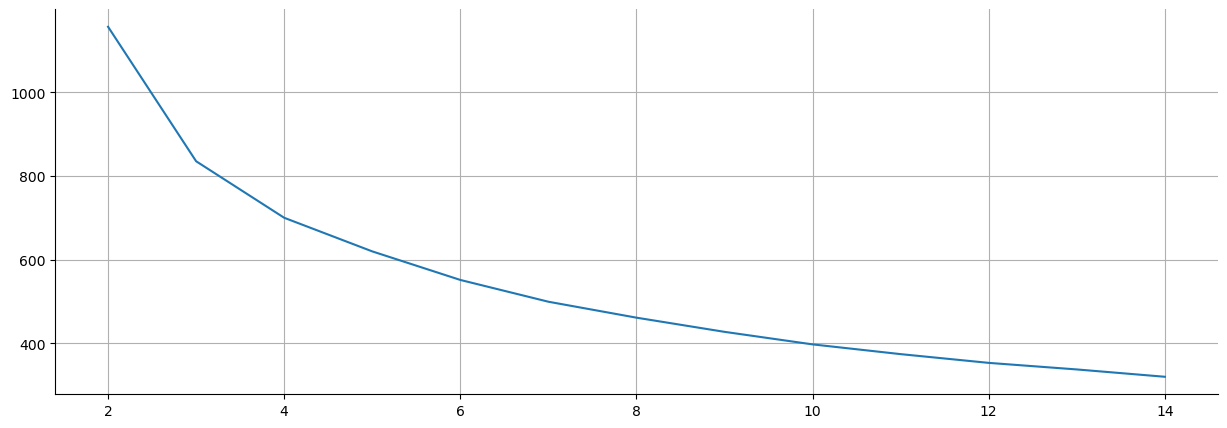

In [209]:
plt.figure(figsize=(15, 5))
plt.plot(n_clusters, distortions)
plt.grid()
sns.despine()

* De forma grosseira, a partir do gráfico acima, um valor para o número de clusters seria entre 4 e 6.

## Fit Model

In [210]:
k = 4

km = KMeans(n_clusters=k, max_iter=10000, n_init=100, random_state=42)

pred_clusters = km.fit_predict(df_country_transformed.values)

In [211]:
pred_clusters

array([3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 1,
       2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 2, 1, 3, 2, 2, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3])

In [214]:
country_data['cluster'] = pred_clusters

## Características gerais dos Clusters

In [217]:
country_data.groupby(by='cluster').agg(['mean', 'std'])

child_mort                exports               health            \
              mean        std        mean        std      mean       std   
cluster                                                                    
0         4.133333   2.309401  176.000000  23.515952  6.793333  2.492877   
1        21.389655  13.821462   41.290678  19.523129  6.235862  2.158742   
2         4.953333   2.159140   45.826667  21.736255  9.168667  3.266299   
3        92.961702  33.375229   29.151277  18.160597  6.388511  2.662015   

            imports                   income                inflation  \
               mean        std          mean           std       mean   
cluster                                                                 
0        156.666667  16.165808  64033.333333  32460.642836   2.468000   
1         48.038689  20.083366  12968.620690   8870.376775   7.413460   
2         39.736667  17.455134  45250.000000  19785.308900   2.742200   
3         42.323404  17.732741   3942.404255   5641.790360  12.019681   

                   life_expec           total_fer                    gdpp  \
               std       mean       std      mean       std          mean   
cluster                                                                     
0         2.179718  81.433333  1.205543  1.380000  0.240624  57566.666667   
1         7.808165  72.935632  3.947474  2.286552  0.696392   6919.103448   
2         4.266366  80.376667  1.440231  1.795333  0.369293  43333.333333   
3        15.509958  59.187234  6.443521  5.008085  1.041382   1922.382979   

                       
                  std  
cluster                
0        43011.665084  
1         5453.932294  
2        15040.114942  
3         2956.103925

## Decisão a ser tomada

* Analisando as característica de cada cluster encontrado, focaria primeiro nos clusters **3** e **1**, pois:
    1. são os que apresentam maior taxa de mortalidade de crianças;
    2. as pessoas ganahm menos;
    3. possuem baixas expectitiva de vida;
    4. a renda per capita é menor;

* Países a serem priorizados:

In [222]:
country_3 = country_data[country_data['cluster'] == 3]
country_3.index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'],
      dtype='object', name='country')

In [223]:
country_1 = country_data[country_data['cluster'] == 1]
country_1.index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic',
       'Solomon Islands', 'Sri